### Here's an example of fitting a linear regression model to two timeseries using randomly generated data - val

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import scipy.stats as st
from scipy.io import loadmat
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import math

import pandas as pd
import scipy.io as sio
import scipy.stats as st


## Generate data and plot timeseries

In [6]:
# let's create data to work with
var_a = np.random.randint(1,101,100)
var_b = np.random.randint(5,501,100)

Text(0, 0.5, 'y-label')

<Figure size 1440x1080 with 0 Axes>

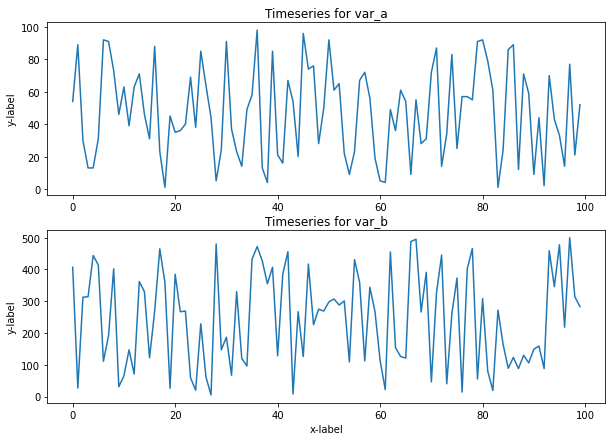

In [10]:
#plot sample year before fire
plt.figure(figsize=(20,15))
fig1,axs= plt.subplots(2, 1, figsize=(10,7))
fig1.subplots_adjust(wspace=10)
#fig1.suptitle('Year 1998')

axs[0].plot(var_a)
axs[0].set_title('Timeseries for var_a')
#axs[0].set_xlabel('x-label')
axs[0].set_ylabel('y-label')

axs[1].plot(var_b)
axs[1].set_title('Timeseries for var_b')
axs[1].set_xlabel('x-label')
axs[1].set_ylabel('y-label')

## Fit a linear regression model to the data

In [11]:
n = var_a.size;
B1 = (n* np.sum(var_a*var_b) - np.sum(var_a)*np.sum(var_b))/(n*np.sum(var_b**2) - (np.sum(var_b))**2);
B0 = np.mean(var_a) - B1*np.mean(var_b);
x = np.linspace(np.min(var_b), np.max(var_b),n)
y = B0 + B1*x
print('B1 is')
print(B1)
print('B0 is')
print(B0)


B1 is
-0.02010004668805261
B0 is
52.403104435304726


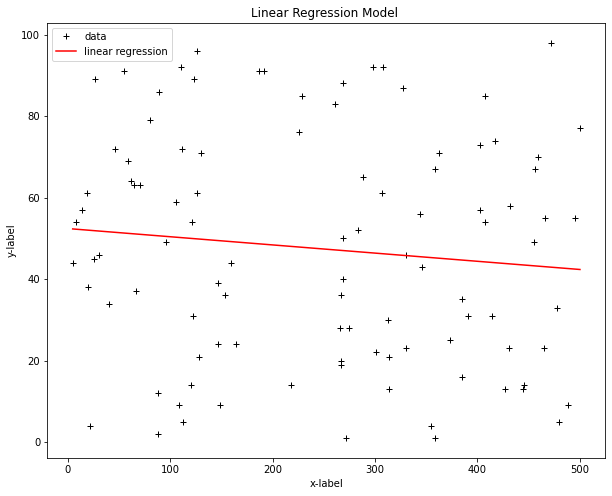

In [12]:
# plot 
plt.figure(figsize=(10,8))
plt.plot(var_b,var_a,'k+',label='data')
#label
plt.ylabel('y-label');
plt.xlabel('x-label')
plt.plot(x,y,'r-',label='linear regression');
plt.title('Linear Regression Model ')

# configure legend
plt.legend(loc='upper left')


## Check correlation

In [13]:
#Calc residuals of lin reg
r1p = var_a - (B0+B1*(var_b))

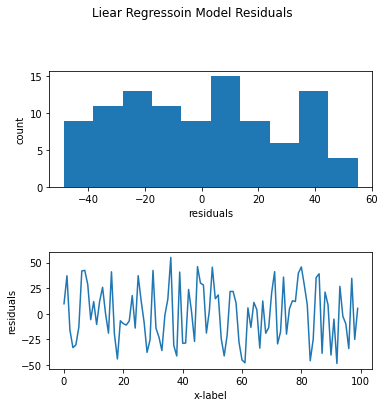

In [14]:
# Check that residuals are normally distributed
f, (ax1, ax2) = plt.subplots(2,1,figsize=(6,6))
f.suptitle('Liear Regressoin Model Residuals')
ax1.hist(r1p)
ax1.set_xlabel('residuals')
ax1.set_ylabel('count')
ax2.plot(r1p)
ax2.set_xlabel('x-label')

ax2.set_ylabel('residuals')
f.tight_layout(pad=3.0)

In [15]:
# Check Correlation Coefficient
R, P = st.pearsonr(var_b, var_a)
print('R = ', R)
print('R squared = ' , R*R)
print('P = ' , P)

R =  -0.10902355016148178
R squared =  0.011886134489813134
P =  0.28025314791165645


In [16]:
# create series of new test x-values to predict for
p_x1p = np.arange(np.min(x),np.max(x)+1,1)

# Calculate confidence intervals for new test x-series
mean_x1p = np.mean(x) 
n1p = x.size 
t1p = st.t.ppf(0.975, n1p-2) 
sse1p = np.sum(r1p**2) 
st_err1p = np.sqrt(sse1p/(n1p-2)) 
sigma1p = st_err1p**2 * (1 + 1/n1p + ( ( n1p*(p_x1p-mean_x1p)**2 ) / ( n1p*np.sum(x**2) - np.sum(x)**2 ) ) )
confs1p = t1p * np.sqrt(sigma1p)

## Plot confidence intervals

In [17]:
# Predict y based on test x-values
p_y1p = B1*p_x1p+B0

# Get lower and upper confidence limits based on predicted y and confidence intervals
lower1p = p_y1p - np.abs(confs1p)
upper1p = p_y1p + np.abs(confs1p)

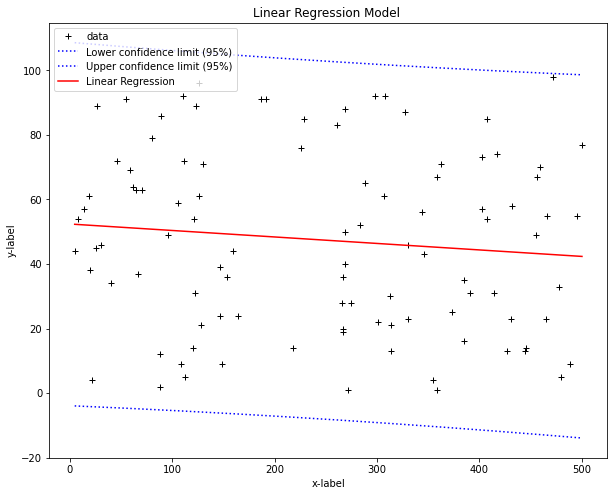

In [18]:
# plot 
plt.figure(figsize=(10,8))

plt.plot(var_b,var_a, 'k+',label='data');

# plot confidence limits
plt.plot(p_x1p,lower1p,':b',label='Lower confidence limit (95%)')
plt.plot(p_x1p,upper1p,':b',label='Upper confidence limit (95%)')

#label
plt.ylabel('y-label');
plt.xlabel('x-label')
plt.plot(x,y,'r-',label='Linear Regression');
plt.title('Linear Regression Model ')

# configure legend
plt.legend(loc='upper left')
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10);